# Social Media Usage and Mental Health Analysis
## Domain: Healthcare
In this notebook, we will perform data cleaning, descriptive statistics, univariate and bivariate analysis.

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/social_media_usage_mental_health.csv')
df.head()

,user_id,age,country,platform,daily_usage_minutes,content_type,engagement_score,mental_fatigue_level,date
0,1,54,UK,Instagram,253,Reels,0.79,9,2023-01-01 00:00:00
1,2,44,Germany,Instagram,205,Reels,7.46,7,2023-01-01 01:00:00
2,3,30,UK,X,63,Live,2.86,6,2023-01-01 02:00:00
3,4,58,Australia,YouTube,144,Live,4.00,1,2023-01-01 03:00:00
4,5,23,USA,YouTube,123,Shorts,8.32,9,2023-01-01 04:00:00


## 3. Data Preprocessing
### Handling Missing Values

In [ ]:
df.isnull().sum()

,0
user_id,0
age,0
country,0
platform,0
daily_usage_minutes,0
content_type,0
engagement_score,0
mental_fatigue_level,0
date,0


### Removing Missing Values (if any)

In [ ]:
df_cleaned = df.dropna()
df_cleaned.shape

(5000, 9)

### Handling Outliers using IQR (Daily Usage Minutes)

In [ ]:
Q1 = df_cleaned['daily_usage_minutes'].quantile(0.25)
Q3 = df_cleaned['daily_usage_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[(df_cleaned['daily_usage_minutes'] >= lower_bound) &
                        (df_cleaned['daily_usage_minutes'] <= upper_bound)]
df_cleaned.shape

(5000, 9)

## 4. Descriptive Statistics

In [ ]:
numerical_cols = ['daily_usage_minutes', 'engagement_score', 'mental_fatigue_level']
stats = df_cleaned[numerical_cols].agg(['mean', 'median', 'min', 'max', 'std'])
mode_values = df_cleaned[numerical_cols].mode().iloc[0]
stats.loc['mode'] = mode_values
stats

,daily_usage_minutes,engagement_score,mental_fatigue_level
mean,182.876600,5.242256,5.593400
median,184.000000,5.205000,6.000000
min,5.000000,0.500000,1.000000
max,359.000000,10.000000,10.000000
std,103.110307,2.753031,2.847613
mode,224.000000,1.790000,5.000000


## 5. Univariate Analysis
### Histogram: Daily Usage Minutes

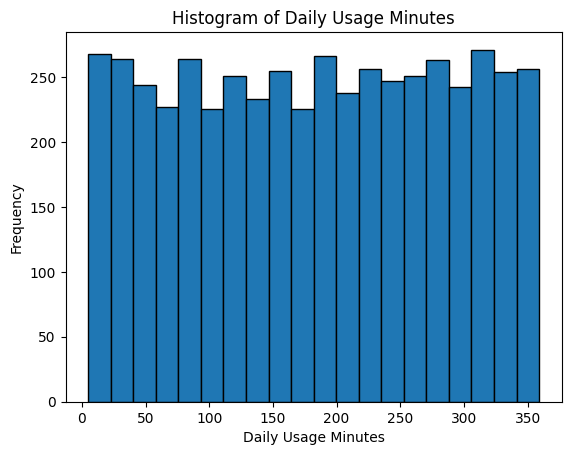

In [ ]:
plt.figure()
plt.hist(df_cleaned['daily_usage_minutes'], bins=20,edgecolor='black')
plt.title('Histogram of Daily Usage Minutes')
plt.xlabel('Daily Usage Minutes')
plt.ylabel('Frequency')
plt.show()

### Histogram: Engagement Score

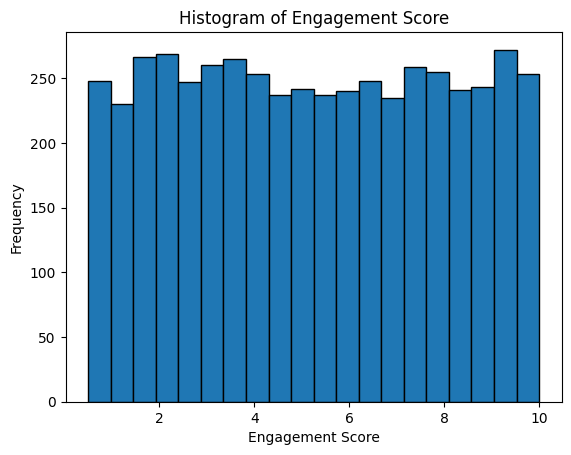

In [ ]:
plt.figure()
plt.hist(df_cleaned['engagement_score'], bins=20,edgecolor='black')
plt.title('Histogram of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()

## 6. Bivariate Analysis
### Mental Fatigue Level by Platform

<Figure size 640x480 with 0 Axes>

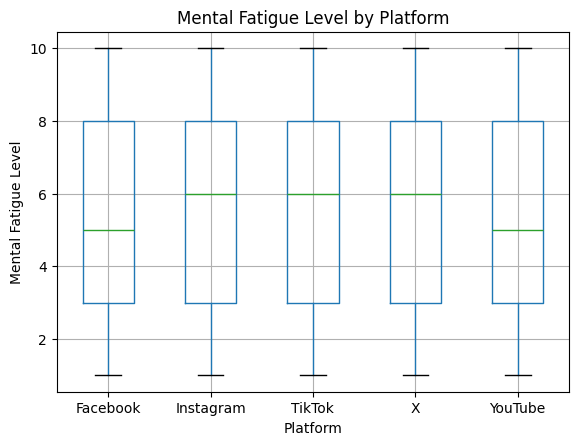

In [20]:
plt.figure()
df_cleaned.boxplot(column='mental_fatigue_level', by='platform')
plt.title('Mental Fatigue Level by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Mental Fatigue Level')
plt.show()

## 7. Conclusion
- Average daily usage is around 3 hours.
- Engagement scores are moderately distributed.
- Mental fatigue levels are moderately high across platforms.
- No single platform shows extreme fatigue differences.